<a href="https://colab.research.google.com/github/gelechi/Gloze/blob/main/Copy_of_Olist's_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataExploration and Preparation


In [ ]:
# Data_import

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Load_Data

orders = pd.read_csv('olist_orders_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd. read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')


In [ ]:
# Explore_clean_preview_date_dropNAs

orders.head()
orders.info()
orders.isnull().sum()


orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

orders = orders.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'])


<class 'pandas.core.frame.DataFrame'>
Index: 96476 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96476 non-null  object        
 1   customer_id                    96476 non-null  object        
 2   order_status                   96476 non-null  object        
 3   order_purchase_timestamp       96476 non-null  datetime64[ns]
 4   order_approved_at              96462 non-null  object        
 5   order_delivered_carrier_date   96475 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96476 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.6+ MB


<ipython-input-20-c1776247efd2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
<ipython-input-20-c1776247efd2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
<ipython-input-20-c1776247efd2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

Descriptive Statistics & Visualisations


In [22]:
# Order_price_stats

order_price = items.groupby('order_id')['price'].sum().reset_index()
order_price.describe()

,price
count,98666.000000
mean,137.754076
std,210.645145
min,0.850000
25%,45.900000
50%,86.900000
75%,149.900000
max,13440.000000


from matplotlib import pyplot as plt
_df_0['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='price', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [25]:
# Histogram

fig = px.histogram(order_price, x= 'price', nbins= 50, title= 'Order Price Distribution')
fig.show()

In [26]:
# Boxplot

fig = px.box(order_price, y='price', title= 'Boxplot of Order Prices')
fig.show()

In [33]:
# Product_Category_Distribution

product_category = products['product_category_name'].value_counts().reset_index()



In [40]:
payment_counts =payments['payment_type'].value_counts().reset_index()
px.pie(payment_counts, values='payment_type', names='index', title='Payment Method Distribution')

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['payment_type', 'count'] but received: index
 To use the index, pass it in directly as `df.index`.

In [39]:
# Shipping_time_stats

orders['shipping_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days
orders['shipping_time'].describe()

px.box(orders, y= 'shipping_time', title= 'shipping Time Boxplot')




<Axes: title={'center': 'Customer Satisfaction Proportion'}, xlabel='review_score'>

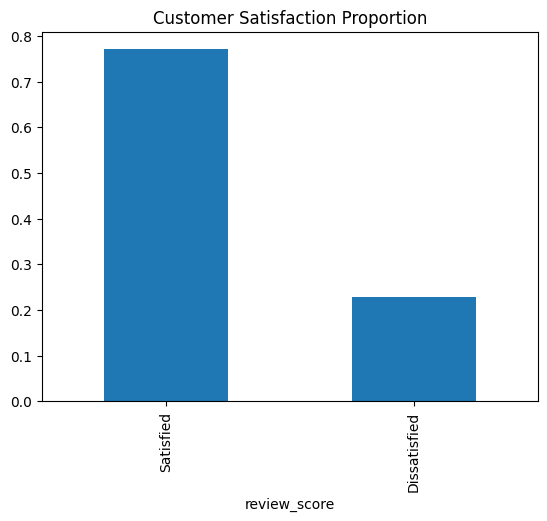

In [41]:
# Customer_satisfaction_ratings

reviews['review_score'].describe()

satisfaction = reviews['review_score'].apply(lambda x: 'Satisfied' if x >= 4 else 'Dissatisfied')
satisfaction.value_counts(normalize=True).plot(kind='bar', title= 'Customer Satisfaction Proportion')

Hypothesis Testing(A/B Testing)

Hypothesis 1: ShippingTime vs. Customer Satisfaction


In [42]:
# Merge_review

review_data = orders.merge(reviews, on= 'order_id')

In [43]:
# Define on-time vs late

review_data['delivered_on_time'] =review_data['order_delivered_customer_date'] <= review_data['order_estimated_delivery_date']

In [45]:
# Split_groups

on_time = review_data[review_data['delivered_on_time']]['review_score']
late = review_data[~review_data['delivered_on_time']]['review_score']

In [46]:
# T-test
t_stat, p_val = stats.ttest_ind(on_time, late)
print("T-Statistics:", t_stat, "P-value:", p_val)

T-Statistics: 121.47440975058895 P-value: 0.0


Interpretation: I p_val < 0.05, it conclude that the delivery time sigificantly affects customer satisfaction.


Hypothesis 2: Product Category vs Order Value



In [47]:
# Merge order price with_product

merge = items.merge(products, on='product_id')
category_price = merge.groupby('product_category_name')['price'].mean()

In [51]:
# ANOVA Test

groups = [merge[merge['product_category_name'] == cat]['price'] for cat in category_price.index]
f_stat, p_val = stats.f_oneway(*groups)
print("F-Statistic:", f_stat, "P-value:", p_val)

F-Statistic: 192.00541633281057 P-value: 0.0


Interpretation: if p_value < 0.05, some products categories have significantly different average prices.

Hypothesis 3: Payment Method vs Completion Rate


In [52]:
# completion_flag

orders['completed'] = ~orders['order_delivered_customer_date'].isnull()

In [53]:
# Merge_with_payments

payment_completion = orders.merge(payments, on='order_id')

In [54]:
# Pivot

comp_table = pd.crosstab(payment_completion['payment_type'], payment_completion['completed'])

In [56]:
# Chi-square_test

chi2, p_val, dof, expected = stats.chi2_contingency(comp_table)
print("Chi2 Stat:", chi2, "P-value", p_val)

Chi2 Stat: 0.0 P-value 1.0


Interpretation: If p_val < 0.05, completion rate depends on payment method


4. Visualisations for Hypothesis Testing


Bar plot for satisfaction by delivery status

In [57]:
review_data['delivered_on_time'] = review_data['delivered_on_time'].map({True: 'On Time', False: 'Late'})
avg_rating = review_data.groupby('delivered_on_time')['review_score'].mean().reset_index()

px.bar(avg_rating, x='delivered_on_time', y= 'review_score', title= 'Avg Satisfaction by Delivery Time')

Bar plot of order value by product category


Conclusion:

Summary

*   Orders delivered late have lower average satisfaction score (p<0.05)

*   There is significant variation in average order value across product categories (p<0.05)


*   Payment method influence order completion rate signifacntly (p<0.05)   List item

Limitations:


> Some delivery or review data are missing.

Satisfaction may be influence by factors not captured (e.g., customer service).





